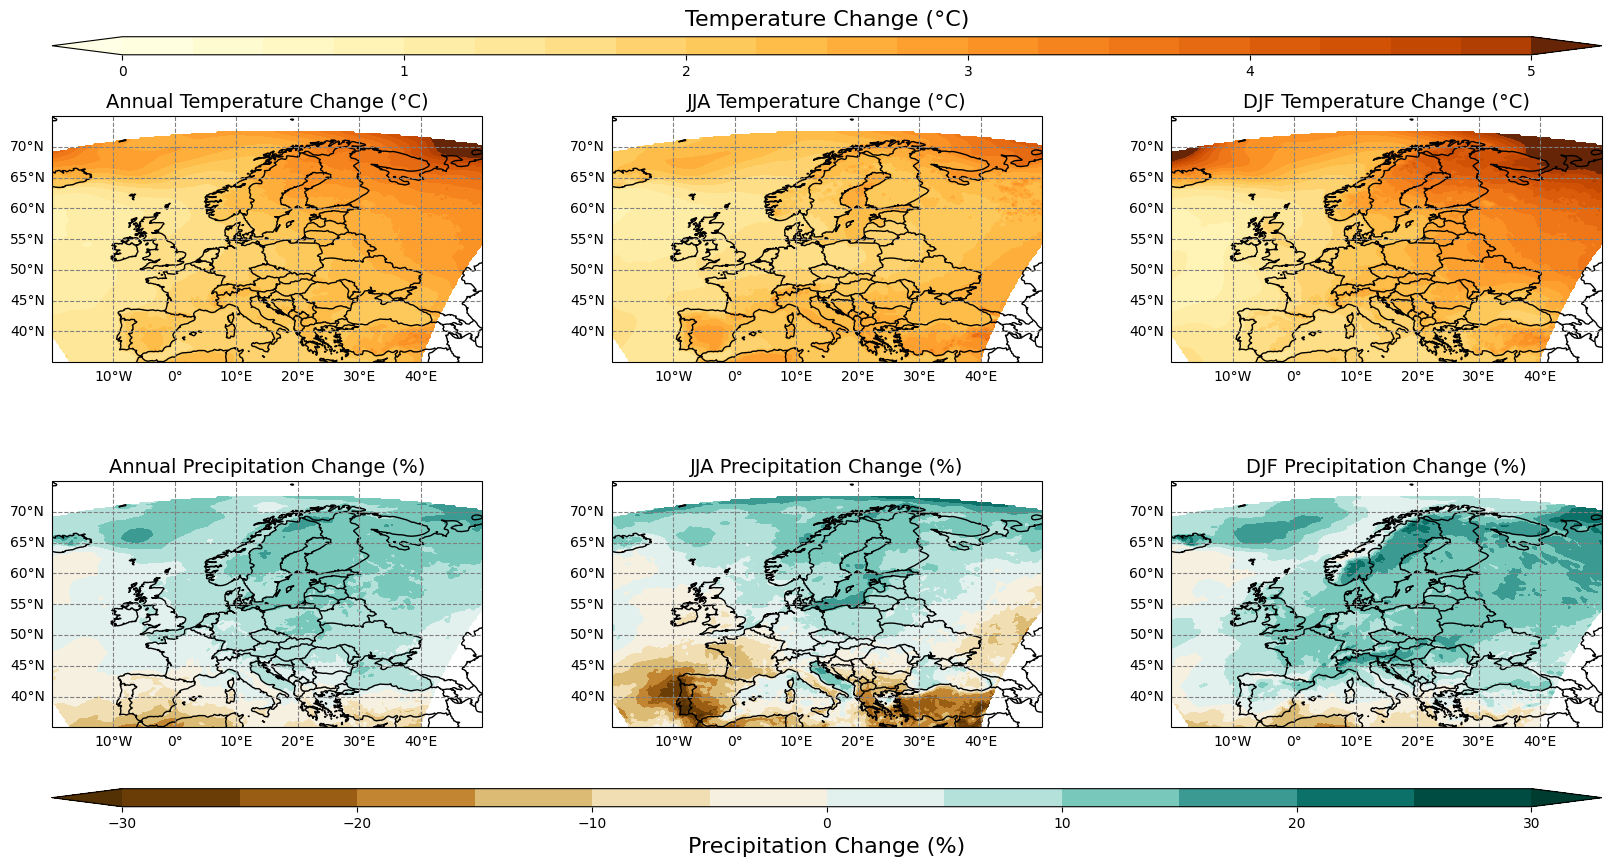

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    'Annual 2100.nc',  # Replace with your actual temperature file paths
    'JJA 2100.nc',
    'DJF 2100.nc'
]

data_files_precipitation = [
    'Annual1 2100.nc',  # Replace with your actual precipitation file paths
    'JJA1 2100.nc',
    'DJF1 2100.nc'
]

# Use YlOrBr colormap for temperature
cmap_temp = plt.get_cmap('YlOrBr')

# Set normalization for temperature (0 to 5°C)
norm_temp = plt.Normalize(vmin=0, vmax=6)

# Set up the figure and GridSpec layout with colorbars at the top and bottom
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 3, height_ratios=[0.05, 1, 1, 0.05], wspace=0.3, hspace=0.02)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[2, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization for precipitation (% change) with range -30 to 30
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-30, vcenter=0, vmax=30)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Change (°C)', 'JJA Temperature Change (°C)', 'DJF Temperature Change (°C)']
titles_precipitation = ['Annual Precipitation Change (%)', 'JJA Precipitation Change (%)', 'DJF Precipitation Change (%)']

# Plot temperature changes
for i, historical_file in enumerate(data_files_temperature):
    # Load the temperature data directly
    historical_data = xr.open_dataset(historical_file)
    temperature_data = historical_data['tas_anom']  # Assuming 'tas_anom' is the variable for temperature change

    # Plot the temperature changes on the i-th axis
    contour_temp = axes_temperature[i].contourf(temperature_data.lon, temperature_data.lat, temperature_data, 
                                                cmap=cmap_temp, norm=norm_temp, levels=np.linspace(0, 5, 21), 
                                                extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot with the specified font size
    axes_temperature[i].set_title(titles_temperature[i], fontsize=14)

# Plot precipitation changes
for i, historical_file in enumerate(data_files_precipitation):
    # Load the precipitation data directly
    historical_data = xr.open_dataset(historical_file)
    precipitation_data = historical_data['pr_relanom']  # Assuming 'pr_relanom' is the variable for precipitation change

    # Plot the precipitation changes on the i-th axis
    contour_prec = axes_precipitation[i].contourf(precipitation_data.lon, precipitation_data.lat, precipitation_data, 
                                                  cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-30, 30, 13), 
                                                  extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot with the specified font size
    axes_precipitation[i].set_title(titles_precipitation[i], fontsize=14)

# Add a horizontal colorbar for temperature at the top
cbar_ax_temp = fig.add_subplot(gs[0, :])  # Space for the temperature colorbar across the top
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='horizontal', shrink=0.8, pad=0.2)
cbar_temp.set_ticks(np.arange(0, 6, 1))  # Set increments to every 1 degree

# Add the temperature color bar title above it with specified font size
cbar_ax_temp.text(0.5, 1.4, 'Temperature Change (°C)', ha='center', va='bottom', fontsize=16, transform=cbar_ax_temp.transAxes)

# Add a horizontal colorbar for precipitation at the bottom with the specified font size
cbar_ax_prec = fig.add_subplot(gs[3, :])  # Space for the precipitation colorbar across the bottom
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='horizontal', shrink=0.8, pad=0.2)
cbar_prec.set_label('Precipitation Change (%)', fontsize=16)  # Set the label with specified font size
cbar_prec.set_ticks(np.arange(-30, 31, 10))  # Set increments to every 10%

# Display the plot
plt.savefig('high_quality_plot_with_white_center.png', dpi=300, bbox_inches='tight')
plt.show()
